# Importing

In [1]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Loading data

In [2]:
df = pd.read_csv(r'C:\\Users\\Lenovo\\Downloads\\archive\\shampoo_sales.csv') #loading file through pandas 

In [3]:
df.head(10) #top 10 rows

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [4]:
df.tail(10) #last 10 rows

,Month,Sales
26,3-03,315.9
27,3-04,439.3
28,3-05,401.3
29,3-06,437.4
30,3-07,575.5
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


# Data Information

In [5]:
df.info() #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [6]:
df.shape

(36, 2)

In [7]:
df.isnull().sum() #To check any non-values

Month    0
Sales    0
dtype: int64

# Splitting Data and converting it 

In [8]:
date = pd.date_range(start='1/1/2018', end='12/31/2020', freq='M')
# pd.date_range: this function returns a fixed frequency DatetimeIndex
# we will range the dataset as it describes monthly number of sales of shampoo over 3 years.
# freq='M' : Stands for month+
df['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
# Dataframe is a two-dimensional data structure
df = df.set_index('Time_Stamp')
#set_index is a method to set a List as index of a Data Frame
df

,Month,Sales
Time_Stamp,,
2018-01-31,1-01,266.0
2018-02-28,1-02,145.9
2018-03-31,1-03,183.1
2018-04-30,1-04,119.3
2018-05-31,1-05,180.3
2018-06-30,1-06,168.5
2018-07-31,1-07,231.8
2018-08-31,1-08,224.5
2018-09-30,1-09,192.8


In [9]:
new_df = df.drop(['Month'], axis=1)
#drop month coloumn as it became useless
new_df.head(10)
#data shape after dropping month

,Sales
Time_Stamp,
2018-01-31,266.0
2018-02-28,145.9
2018-03-31,183.1
2018-04-30,119.3
2018-05-31,180.3
2018-06-30,168.5
2018-07-31,231.8
2018-08-31,224.5
2018-09-30,192.8


# plotting Time series

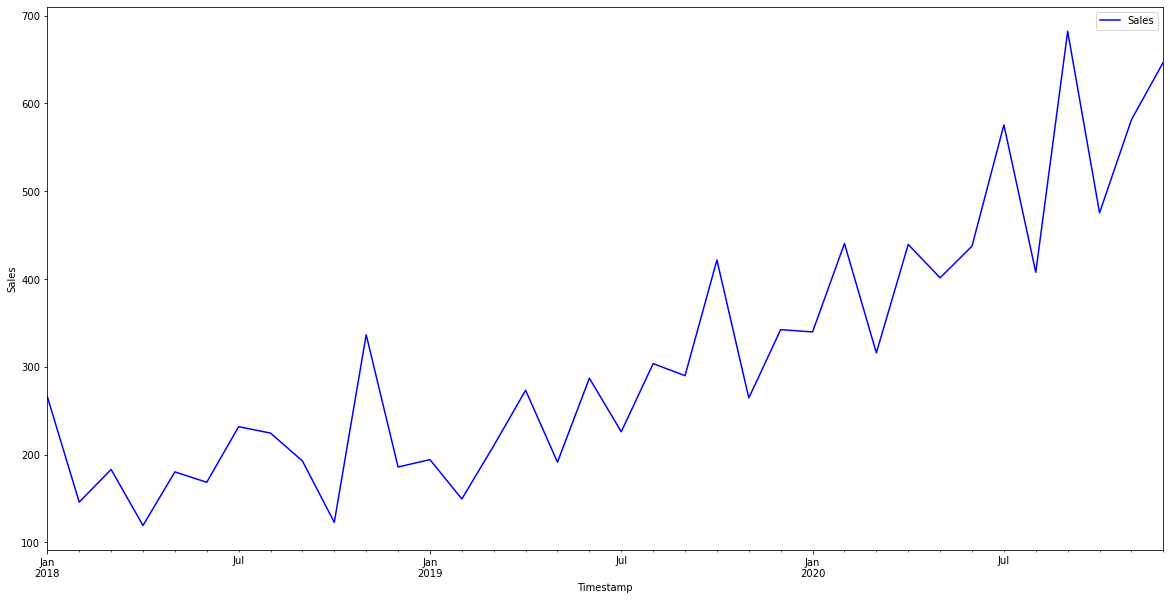

In [10]:
new_df.plot(figsize=(20,10),color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Sales')
plt.rc('xtick')
plt.rc('ytick')
#From the graph we can realize that sales increase between september and november , also between and april ; which means that it increases in autumn season 

# Building Regression model for data

In [11]:
# we will split data
# It is usually good to keep 70% of the data in train dataset and the rest 30% in test dataset
train_data = new_df[0:int(len(df)*0.7)]
test_data = new_df[int(len(df)*0.7):]

In [12]:
#fitting model with time after removing month 
train_time = [i+1 for i in range(len(train_data))] # get the number of each month of the 3 years for the training data
test_time = [i+26 for i in range(len(test_data))] # get the number of each month of the 3 years for the testing data
LinearReg_train = train_data.copy() # get a copy of the training data to use it in regression
LinearReg_test = test_data.copy() #get a copy of the testing data to use it in regression
# add number of month to the regression dataframe
LinearReg_train['time'] = train_time 
LinearReg_test['time'] = test_time

In [13]:
LinearReg_train.head(10) #showing a sample of training data

,Sales,time
Time_Stamp,,
2018-01-31,266.0,1
2018-02-28,145.9,2
2018-03-31,183.1,3
2018-04-30,119.3,4
2018-05-31,180.3,5
2018-06-30,168.5,6
2018-07-31,231.8,7
2018-08-31,224.5,8
2018-09-30,192.8,9


In [14]:
LinearReg_test.head(10) #showing a sample of testing data

,Sales,time
Time_Stamp,,
2020-02-29,440.4,26
2020-03-31,315.9,27
2020-04-30,439.3,28
2020-05-31,401.3,29
2020-06-30,437.4,30
2020-07-31,575.5,31
2020-08-31,407.6,32
2020-09-30,682.0,33
2020-10-31,475.3,34


# Applying Linear Regression between time and sales

In [15]:
LR = LinearRegression()
LR.fit(LinearReg_train[['time']],LinearReg_train['Sales'].values)

LinearRegression()

In [16]:
train_predictions_model = LR.predict(LinearReg_train[['time']])
LinearReg_train['RegOnTime'] = train_predictions_model

test_predictions_model = LR.predict(LinearReg_test[['time']])
LinearReg_test['RegOnTime'] = test_predictions_model

# Plotting regression model for training

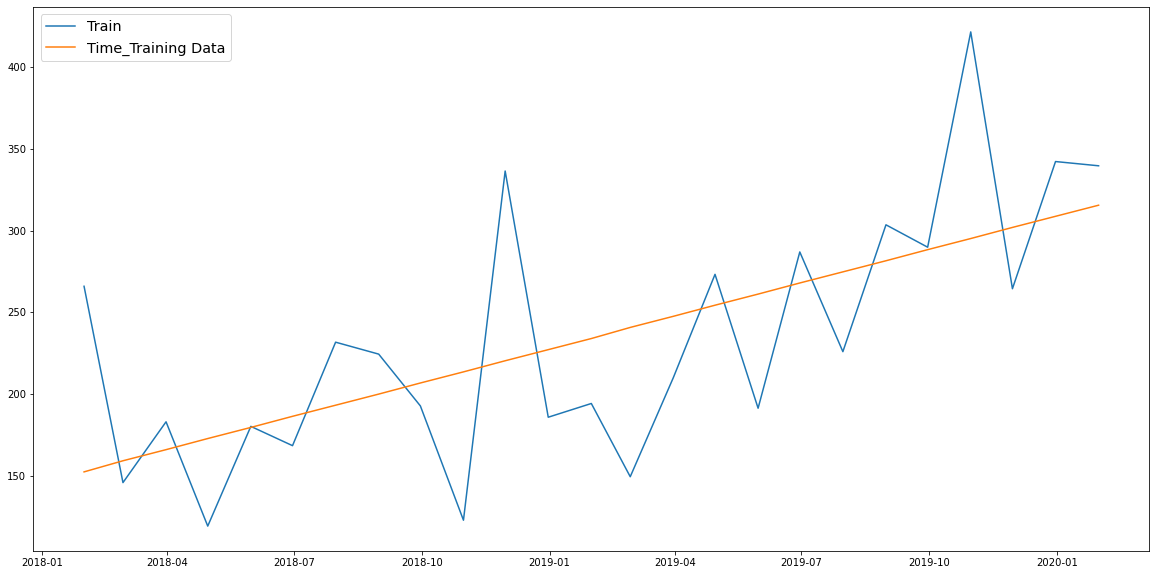

In [17]:
plt.figure(figsize=(20,10))
plt.plot(train_data['Sales'], label='Train')
plt.plot(LinearReg_train['RegOnTime'], label='Time_Training Data')
plt.legend(fontsize="x-large")
#now we will plot model for testing to comment on results

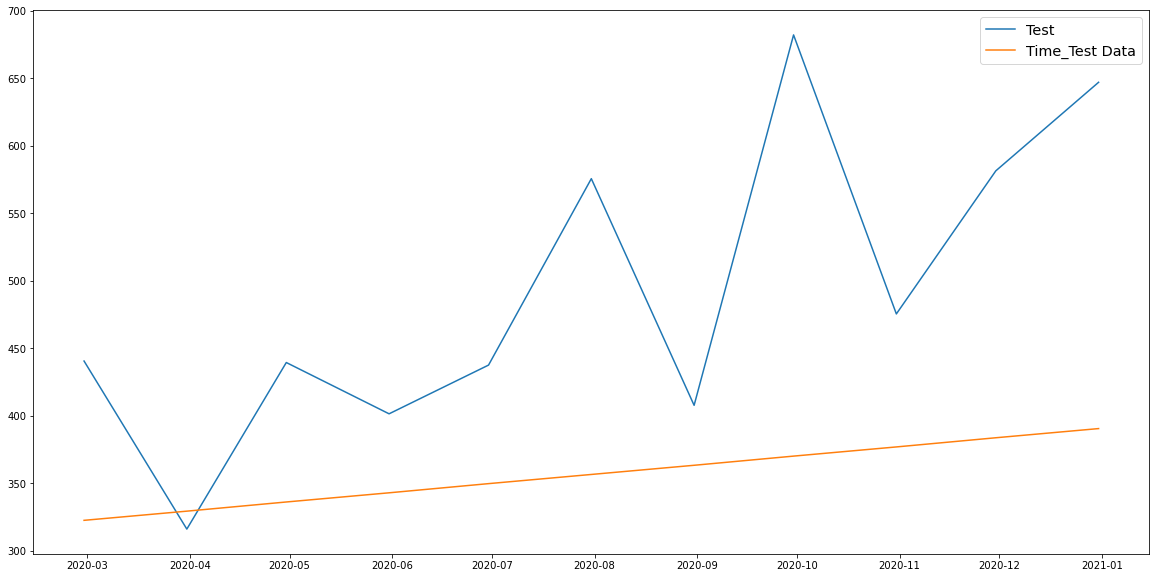

In [18]:
plt.figure(figsize=(20,10))
plt.plot(test_data['Sales'], label='Test')
plt.plot(LinearReg_test['RegOnTime'], label='Time_Test Data')
plt.legend(fontsize="x-large")
#After plotting our regression models , it is now clear that we found that our model is not good ,it is very poor 

# Evaluating error

In [19]:
from sklearn import metrics
rmse_model_train = metrics.mean_squared_error(train_data['Sales'],train_predictions_model,squared=False)
print("MSE on the training data %3.3f " %(rmse_model_train))
rmse_model_test = metrics.mean_squared_error(test_data['Sales'],test_predictions_model,squared=False)
print("MSE on the test data %3.3f " %(rmse_model_test))

MSE on the training data 56.962 
MSE on the test data 164.563 
